# Exploratory Data Analysis and Preprocessing

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

os.chdir("C:/Users/tarad/OneDrive/Documents/USD_GRAD_SCHOOL-C/ADS599_CaptsoneProject/CapStoneProject/MADS-Capstone")

### Restaurunt Food Data (menu_df)

#### **Exploratory Data Analysis**

In [3]:
# Load master food CSV file
menu_df = pd.read_csv('./data/menu_df.csv')

print("Restaurant Data:", menu_df.shape)
menu_df.head()

Restaurant Data: (700, 14)


,restaurant_name,food_name,serving_size,serving_unit,calories,carbohydrates,sugars,fats,saturated_fats,cholesterol,sodium,fiber,potassium,proteins
0,McDonald's Canada,Egg BLT McMuffin with Shredded Lettuce (McDona...,1.0,Serving,7.99,1.55,0.56,0.14,0.02,0.00,3.76,0.99,116.09,0.58
1,McDonald's,Cheeseburger,1.0,Serving,535.31,39.24,7.16,28.66,14.00,95.52,1176.09,2.39,443.77,30.27
2,McDonald's,Hamburger,1.0,Serving,540.14,40.27,NaN,26.56,10.52,122.04,791.00,NaN,569.52,34.28
3,McDonald's,Honey,1.0,Serving,63.84,17.30,17.25,0.00,0.00,0.00,0.84,0.04,10.92,0.06
4,McDonald's,Hotcakes,1.0,Serving,90.80,11.32,NaN,3.88,0.85,23.60,175.60,NaN,52.80,2.56


In [4]:
# Data Overview
print("Menu Data Overview:")
print(menu_df.info())
print(menu_df.describe())

Menu Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_name  700 non-null    object 
 1   food_name        700 non-null    object 
 2   serving_size     700 non-null    float64
 3   serving_unit     700 non-null    object 
 4   calories         700 non-null    float64
 5   carbohydrates    685 non-null    float64
 6   sugars           635 non-null    float64
 7   fats             685 non-null    float64
 8   saturated_fats   683 non-null    float64
 9   cholesterol      679 non-null    float64
 10  sodium           685 non-null    float64
 11  fiber            667 non-null    float64
 12  potassium        682 non-null    float64
 13  proteins         685 non-null    float64
dtypes: float64(11), object(3)
memory usage: 76.7+ KB
None
       serving_size     calories  carbohydrates      sugars        fats  \
count

In [5]:
# Categorical Analysis
print("Top 10 Restaurants in Menu Data:")
print(menu_df['restaurant_name'].value_counts().head(10))

Top 10 Restaurants in Menu Data:
restaurant_name
TGI Friday's         20
Red Lobster          20
Church's Chicken     20
Five Guys            20
Popeye's             20
Whataburger          20
Bertucci's           20
Johnny Rockets       20
Noodles & Company    20
Shake Shack          20
Name: count, dtype: int64


#### Missing Values and Handling

In [6]:
# Missing Values
print("Missing values in Menu Data:")
print(menu_df.isnull().sum())

Missing values in Menu Data:
restaurant_name     0
food_name           0
serving_size        0
serving_unit        0
calories            0
carbohydrates      15
sugars             65
fats               15
saturated_fats     17
cholesterol        21
sodium             15
fiber              33
potassium          18
proteins           15
dtype: int64


In [7]:
problem_rows = menu_df[
    (menu_df['calories'] <= 0) |
    (menu_df['carbohydrates'].isna()) |
    (menu_df['fats'].isna()) |
    (menu_df['proteins'].isna())
]
print("Problematic Rows:")
print(problem_rows)

Problematic Rows:
               restaurant_name              food_name  serving_size  \
6                   McDonald's               McCrispy           1.0   
18                  McDonald's        Deluxe McCrispy           1.0   
131               Panera Bread          Cinnascramble           1.0   
146                     Subway            Giardiniera           1.0   
154                     Subway                   Salt           1.0   
156                     Subway              Subkrunch           1.0   
172                    Chili's     Captain's Castaway           1.0   
173                    Chili's        Casamigos 'Rita           1.0   
181    Ike's Love & Sandwiches              359. IHOP           1.0   
232               Olive Garden          Bottle, Light           1.0   
233               Olive Garden        Bottle, Regular           1.0   
319                        KFC                Twister           1.0   
332           Church's Chicken             Hashrounds      

Distributions of Nutrients

The histogram and boxplot is visualized for nutrients to see how to handle missing variables

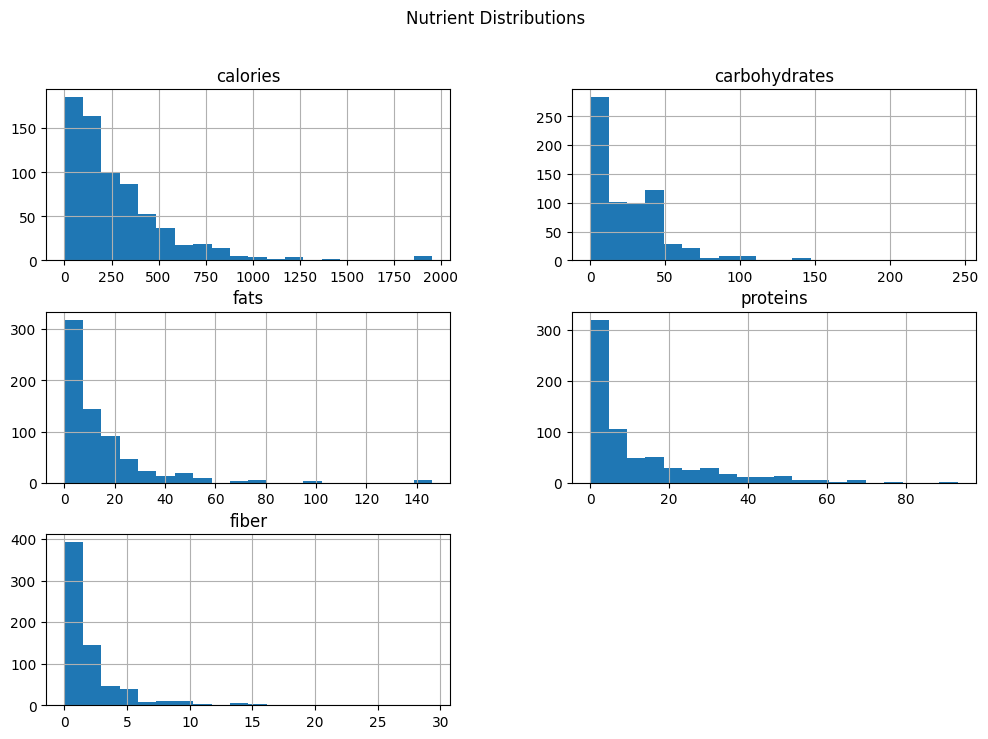

In [8]:
menu_df[['calories', 'carbohydrates', 'fats', 'proteins', 'fiber']].hist(bins=20, figsize=(12, 8))
plt.suptitle("Nutrient Distributions")
plt.show()

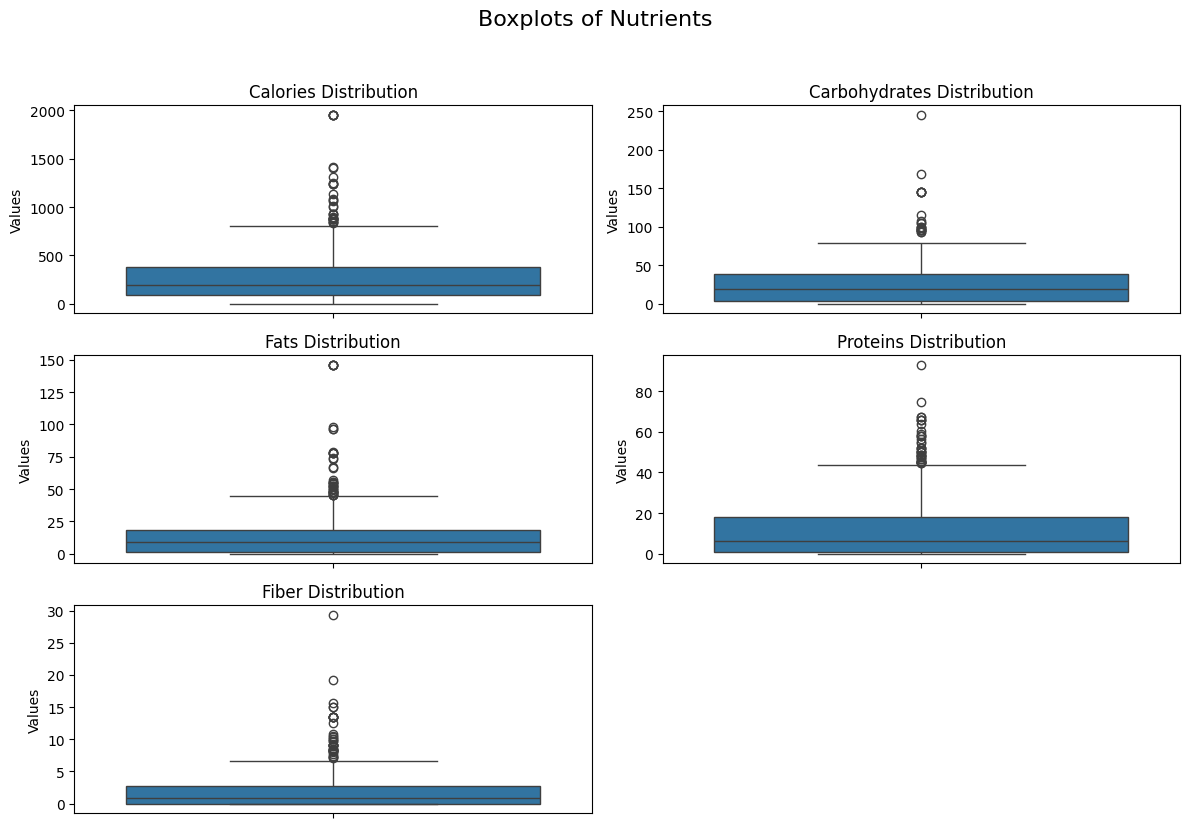

In [9]:
# 3x2 grid for the plots
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing between subplots

# List of nutrients to plot
nutrients = ['calories', 'carbohydrates', 'fats', 'proteins', 'fiber']
titles = ['Calories Distribution', 'Carbohydrates Distribution', 
          'Fats Distribution', 'Proteins Distribution', 'Fiber Distribution']

# Loop through each nutrient and plot
for i in range(len(nutrients)):
    sns.boxplot(y=menu_df[nutrients[i]], ax=axes.flat[i])  # Plot individual nutrient
    axes.flat[i].set_title(titles[i])  # Set corresponding title
    axes.flat[i].set_ylabel('Values')  # Set y-axis label

# Remove the extra subplot (6th one in this case)
if len(axes.flat) > len(nutrients):
    axes.flat[-1].axis('off')

# Show the plots
plt.suptitle('Boxplots of Nutrients', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()


In [10]:
# Handle rows with invalid calories
menu_df = menu_df[menu_df['calories'] > 0]  # Remove rows with zero or negative calories

# Impute critical columns with median
critical_columns = ['carbohydrates', 'fats', 'proteins']
for col in critical_columns:
    menu_df[col] = menu_df[col].fillna(menu_df[col].median())  # Explicit assignment

# Impute secondary columns based on the restaurant or category median
secondary_columns = ['sugars', 'fiber', 'saturated_fats', 'cholesterol', 'potassium', 'sodium']
for col in secondary_columns:
    menu_df[col] = menu_df[col].fillna(menu_df.groupby('restaurant_name')[col].transform('median'))

# For any remaining missing values in secondary columns, use global median
for col in secondary_columns:
    menu_df[col] = menu_df[col].fillna(menu_df[col].median())

In [11]:
# recheck missing values
menu_df.isnull().sum()

restaurant_name    0
food_name          0
serving_size       0
serving_unit       0
calories           0
carbohydrates      0
sugars             0
fats               0
saturated_fats     0
cholesterol        0
sodium             0
fiber              0
potassium          0
proteins           0
dtype: int64

#### Visualizations

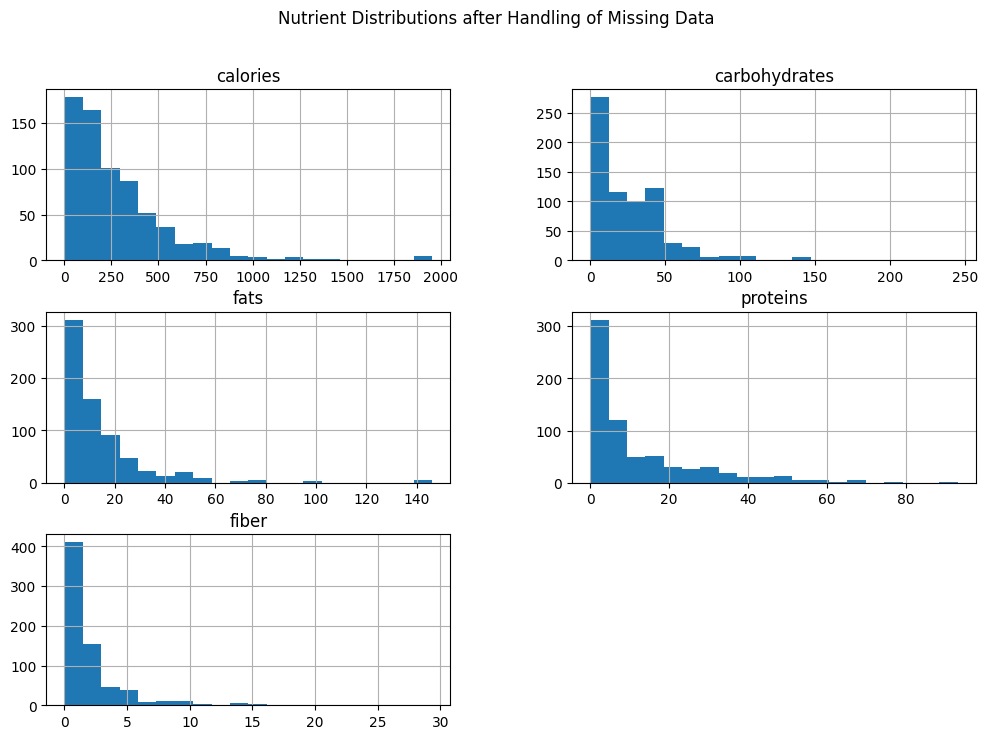

In [12]:
menu_df[['calories', 'carbohydrates', 'fats', 'proteins', 'fiber']].hist(bins=20, figsize=(12, 8))
plt.suptitle("Nutrient Distributions after Handling of Missing Data")
plt.show()

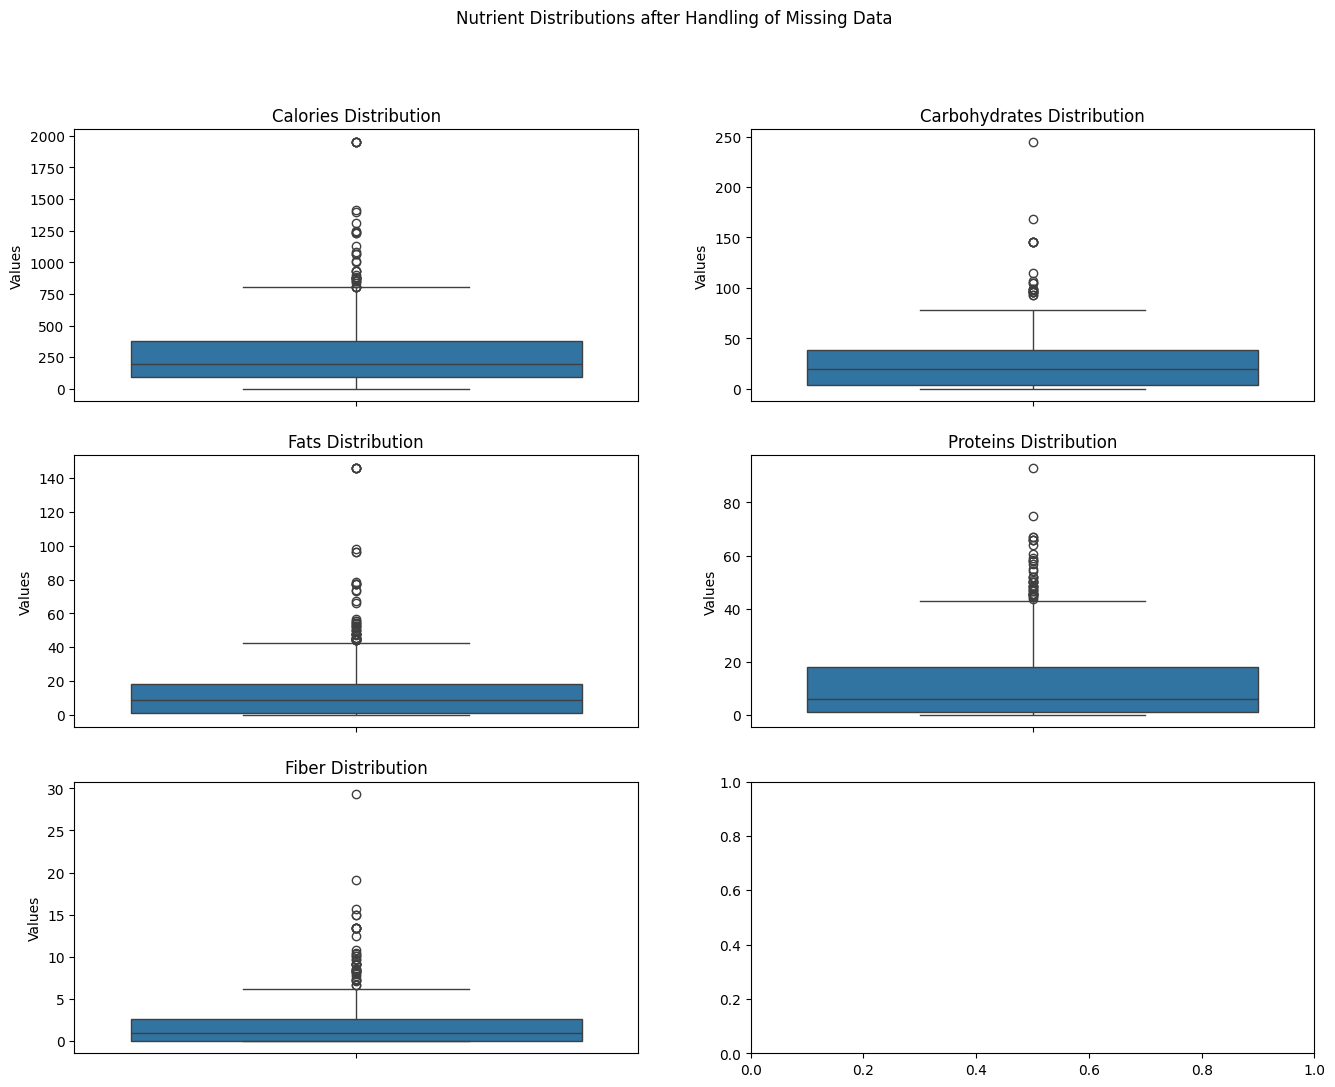

In [13]:
# 2x2 grid for boxplots
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
nutrients = ['calories', 'carbohydrates', 'fats', 'proteins', 'fiber']
titles = ['Calories', 'Carbohydrates', 'Fats', 'Proteins', 'Fiber']

for i, ax in enumerate(axes.flat[:len(nutrients)]):
    sns.boxplot(data=menu_df, y=nutrients[i], ax=ax)
    ax.set_title(f'{titles[i]} Distribution')
    ax.set_ylabel('Values')

plt.suptitle("Nutrient Distributions after Handling of Missing Data")
plt.show()

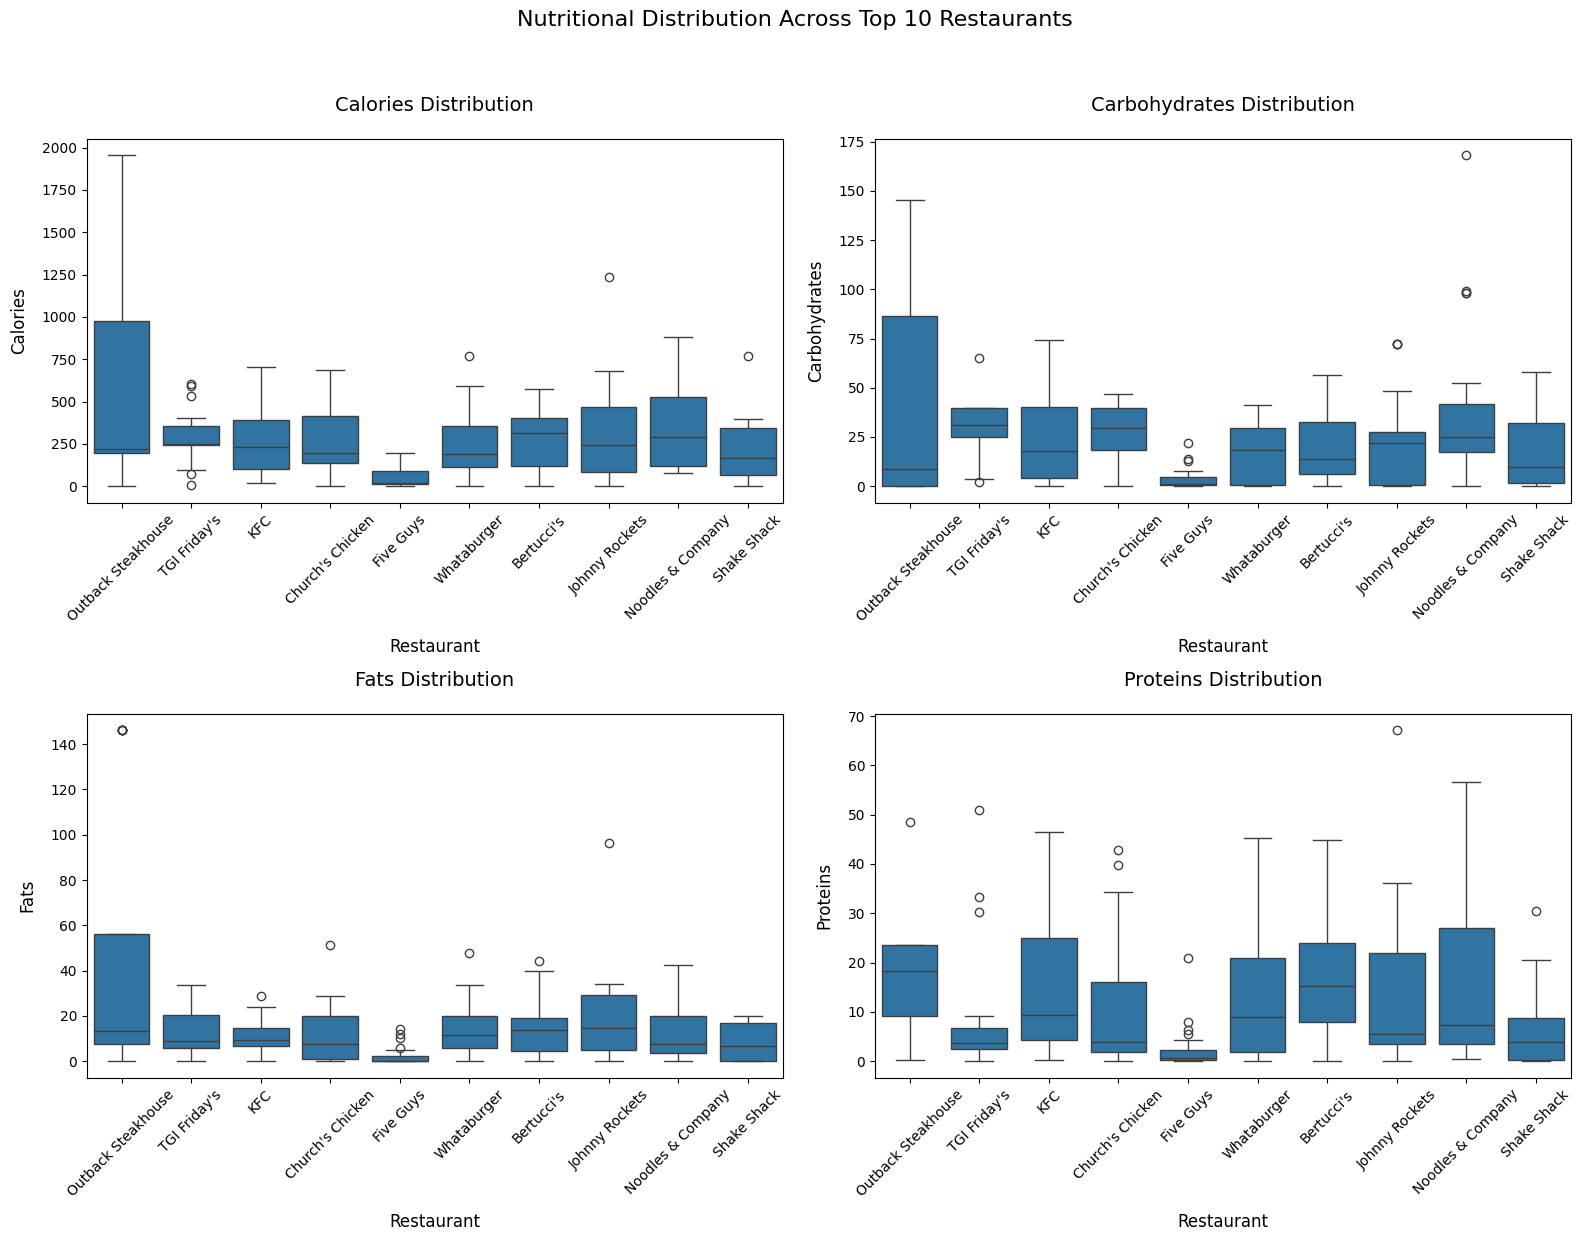

In [14]:
# Select top 10 restaurants by frequency
top_restaurants = menu_df['restaurant_name'].value_counts().head(10).index
filtered_menu_df = menu_df[menu_df['restaurant_name'].isin(top_restaurants)]

# 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing between subplots

# List of nutrients to plot
nutrients = ['calories', 'carbohydrates', 'fats', 'proteins']
titles = ['Calories Distribution', 'Carbohydrates Distribution', 
          'Fats Distribution', 'Proteins Distribution']

# Loop through each nutrient and plot
for i, ax in enumerate(axes.flat):
    sns.boxplot(data=filtered_menu_df, x='restaurant_name', y=nutrients[i], ax=ax)
    ax.set_title(titles[i], fontsize=14, pad=20)  # padding to the title
    ax.set_xlabel('Restaurant', fontsize=12, labelpad=10)  # padding to the x-label
    ax.set_ylabel(nutrients[i].capitalize(), fontsize=12, labelpad=10)  # padding to the y-label
    ax.tick_params(axis='x', rotation=45)

# Show the plots
plt.suptitle('Nutritional Distribution Across Top 10 Restaurants', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()


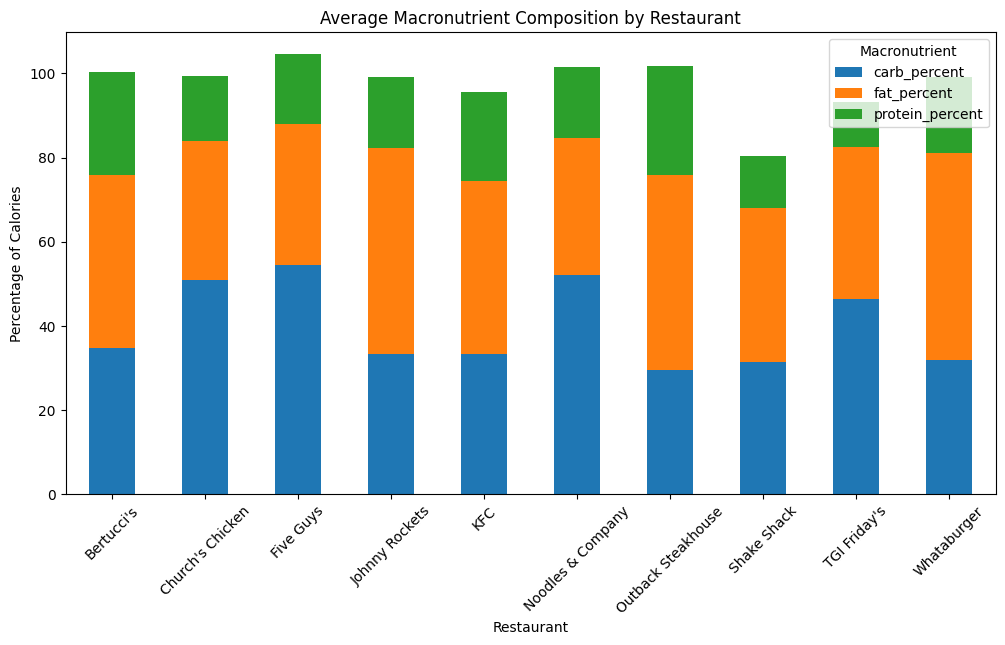

In [15]:
# Calculate macronutrient percentages
menu_df['carb_percent'] = (menu_df['carbohydrates'] * 4) / menu_df['calories'] * 100
menu_df['fat_percent'] = (menu_df['fats'] * 9) / menu_df['calories'] * 100
menu_df['protein_percent'] = (menu_df['proteins'] * 4) / menu_df['calories'] * 100

# Filter for top restaurants
stacked_data = menu_df[menu_df['restaurant_name'].isin(top_restaurants)][
    ['restaurant_name', 'carb_percent', 'fat_percent', 'protein_percent']
].groupby('restaurant_name').mean()

# Plot stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Macronutrient Composition by Restaurant')
plt.ylabel('Percentage of Calories')
plt.xlabel('Restaurant')
plt.legend(title='Macronutrient')
plt.xticks(rotation=45)
plt.show()

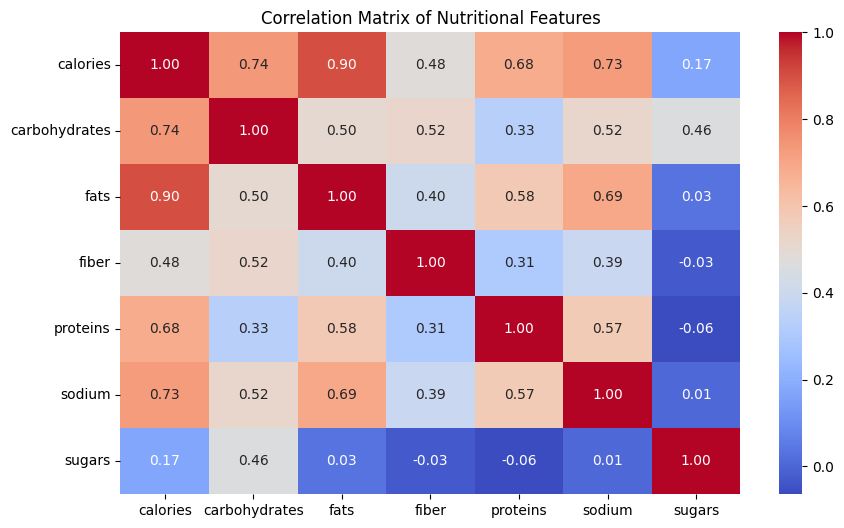

In [16]:
# Calculate correlation
corr_matrix = menu_df[['calories', 'carbohydrates', 'fats', 'fiber', 'proteins', 'sodium', 'sugars']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Nutritional Features')
plt.show()

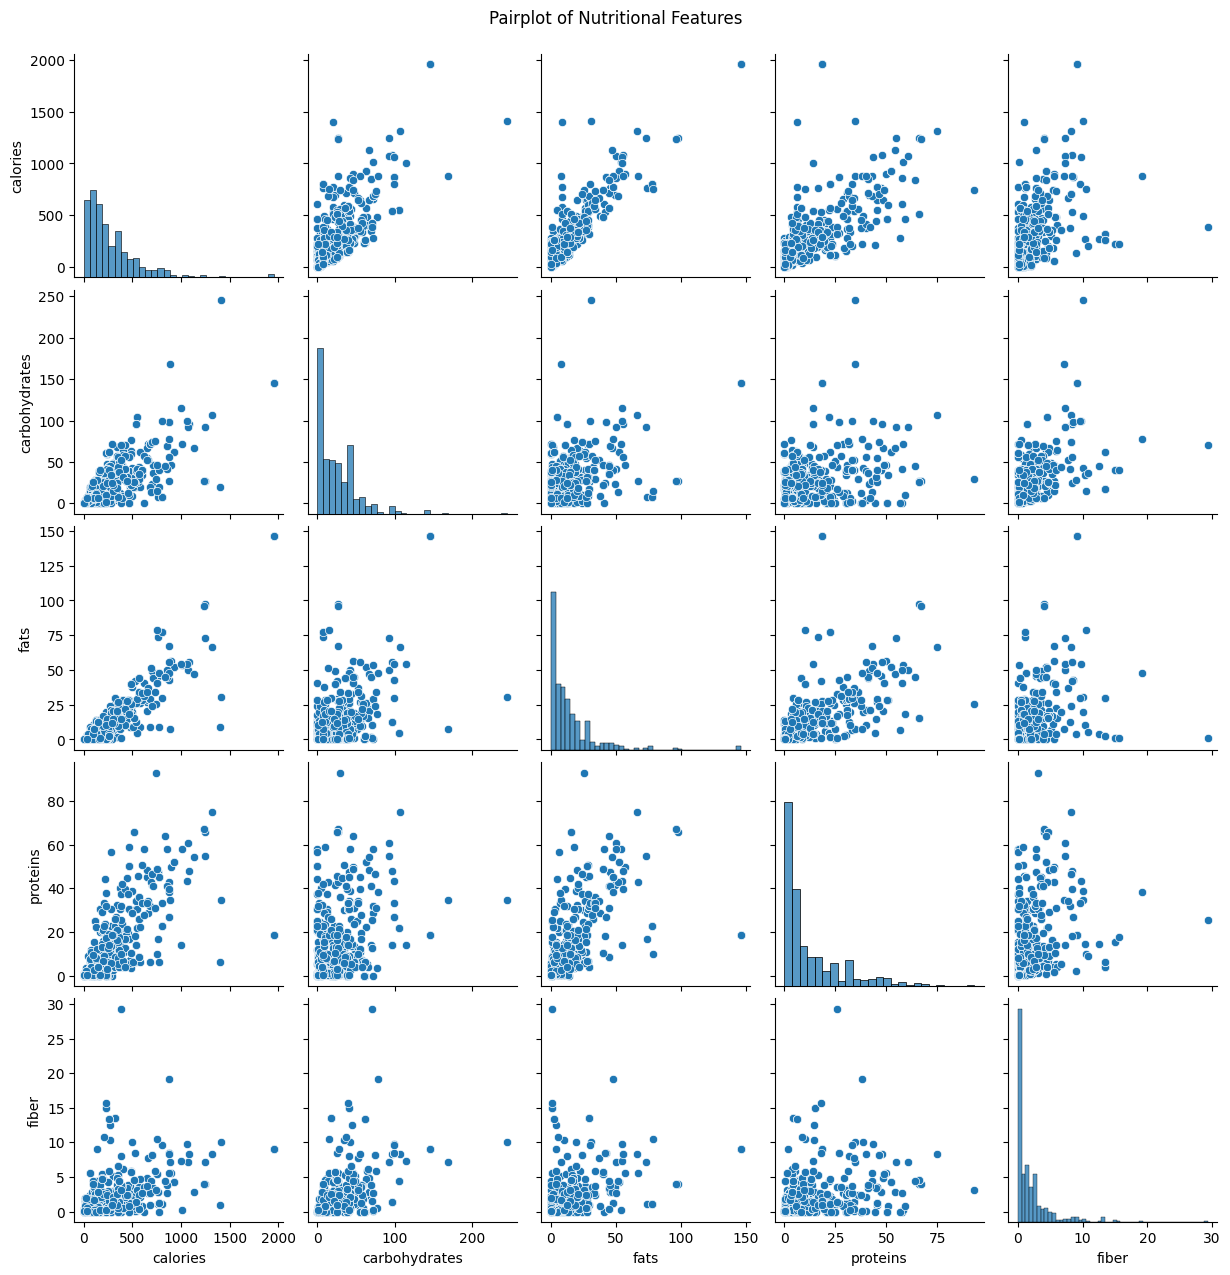

In [17]:
# pairplot to visualize relationships between numerical variables
sns.pairplot(menu_df[['calories', 'carbohydrates', 'fats', 'proteins', 'fiber']])
plt.suptitle('Pairplot of Nutritional Features', y=1.02)
plt.show()

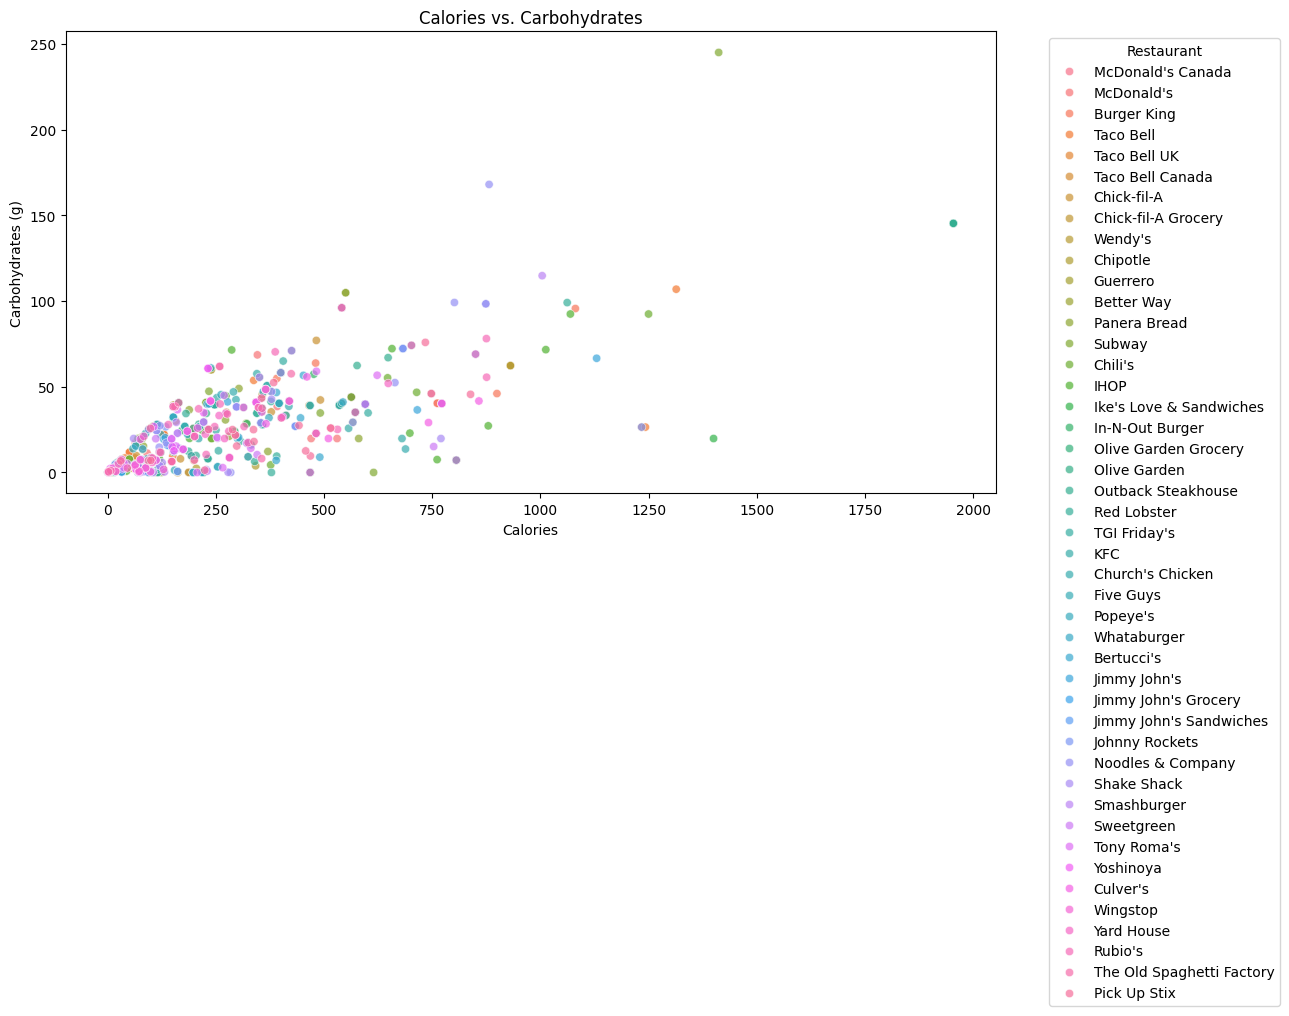

In [18]:
# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=menu_df, x='calories', y='carbohydrates', hue='restaurant_name', alpha=0.7)
plt.title('Calories vs. Carbohydrates')
plt.xlabel('Calories')
plt.ylabel('Carbohydrates (g)')
plt.legend(title='Restaurant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### **Preprocessing**

#### Calculate Suitability Scores

In [19]:
# Set weights based on nutritional importance
carb_weight = 0.5
sugar_weight = 0.3
fiber_weight = 0.1
protein_weight = 0.1

In [20]:
# Set ideal nutritional values
carb_goal = 52.5
sugar_goal = 7.5
fiber_goal = 7.5
protein_goal = 20

In [21]:
# Create function to calculate suitability score
def suitability_score(carbohydrates, sugars, fiber, proteins):
    # Check if any required value is missing
    if pd.isna(carbohydrates) or pd.isna(sugars) or pd.isna(fiber) or pd.isna(proteins):
        # Return -1 as an indicator that the score couldn't be calculated
        return -1
        
    # Make sure score doesn't drop below 0
    carb_score = 1 - abs(carbohydrates - carb_goal) / carb_goal
    carb_score = max(0, carb_score)
    
    # Penalize high sugar content
    sugar_score = 1 - sugars / sugar_goal
    sugar_score = max(0, sugar_score)

    # Cap fiber_score at 1 if >= fiber_goal
    fiber_score = min(fiber / fiber_goal, 1)

    # Cap protein_score at 1 if >= protein_goal
    protein_score = min(proteins / protein_goal, 1)

    score = (carb_weight * carb_score) + (sugar_weight * sugar_score) + (fiber_weight * fiber_score) + (protein_weight * protein_score)

    return round(score, 3)

In [22]:
# Create suitability_score column
menu_df['score'] = menu_df.apply(lambda row: suitability_score(row['carbohydrates'], row['sugars'], row['fiber'], row['proteins']), axis=1)
menu_df.head()

,restaurant_name,food_name,serving_size,serving_unit,calories,carbohydrates,sugars,fats,saturated_fats,cholesterol,sodium,fiber,potassium,proteins,carb_percent,fat_percent,protein_percent,score
0,McDonald's Canada,Egg BLT McMuffin with Shredded Lettuce (McDona...,1.0,Serving,7.99,1.55,0.56,0.14,0.02,0.00,3.76,0.99,116.09,0.58,77.596996,15.769712,29.036295,0.308
1,McDonald's,Cheeseburger,1.0,Serving,535.31,39.24,7.16,28.66,14.00,95.52,1176.09,2.39,443.77,30.27,29.321328,48.185164,22.618670,0.519
2,McDonald's,Hamburger,1.0,Serving,540.14,40.27,7.16,26.56,10.52,122.04,791.00,0.03,569.52,34.28,29.821898,44.255193,25.386011,0.498
3,McDonald's,Honey,1.0,Serving,63.84,17.30,17.25,0.00,0.00,0.00,0.84,0.04,10.92,0.06,108.395990,0.000000,0.375940,0.166
4,McDonald's,Hotcakes,1.0,Serving,90.80,11.32,7.16,3.88,0.85,23.60,175.60,0.03,52.80,2.56,49.867841,38.458150,11.277533,0.135


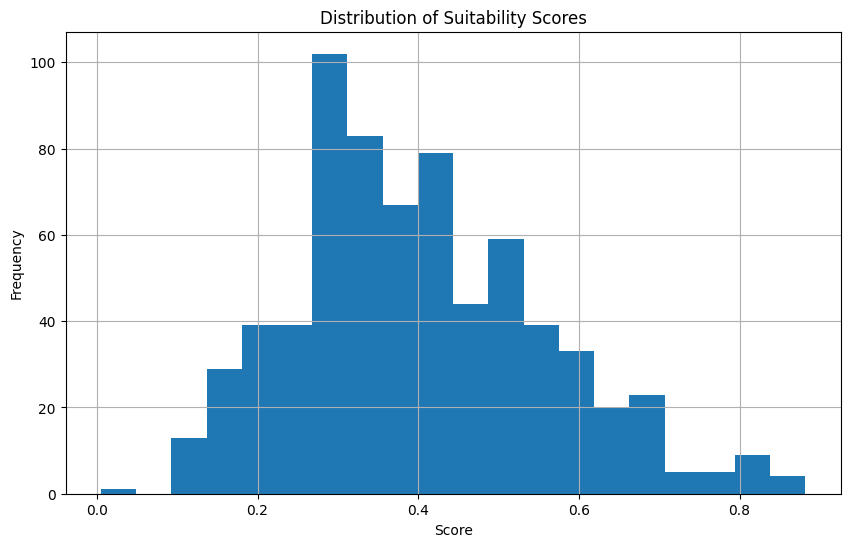

In [23]:
plt.figure(figsize=(10, 6))
menu_df['score'].hist(bins=20)
plt.title('Distribution of Suitability Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

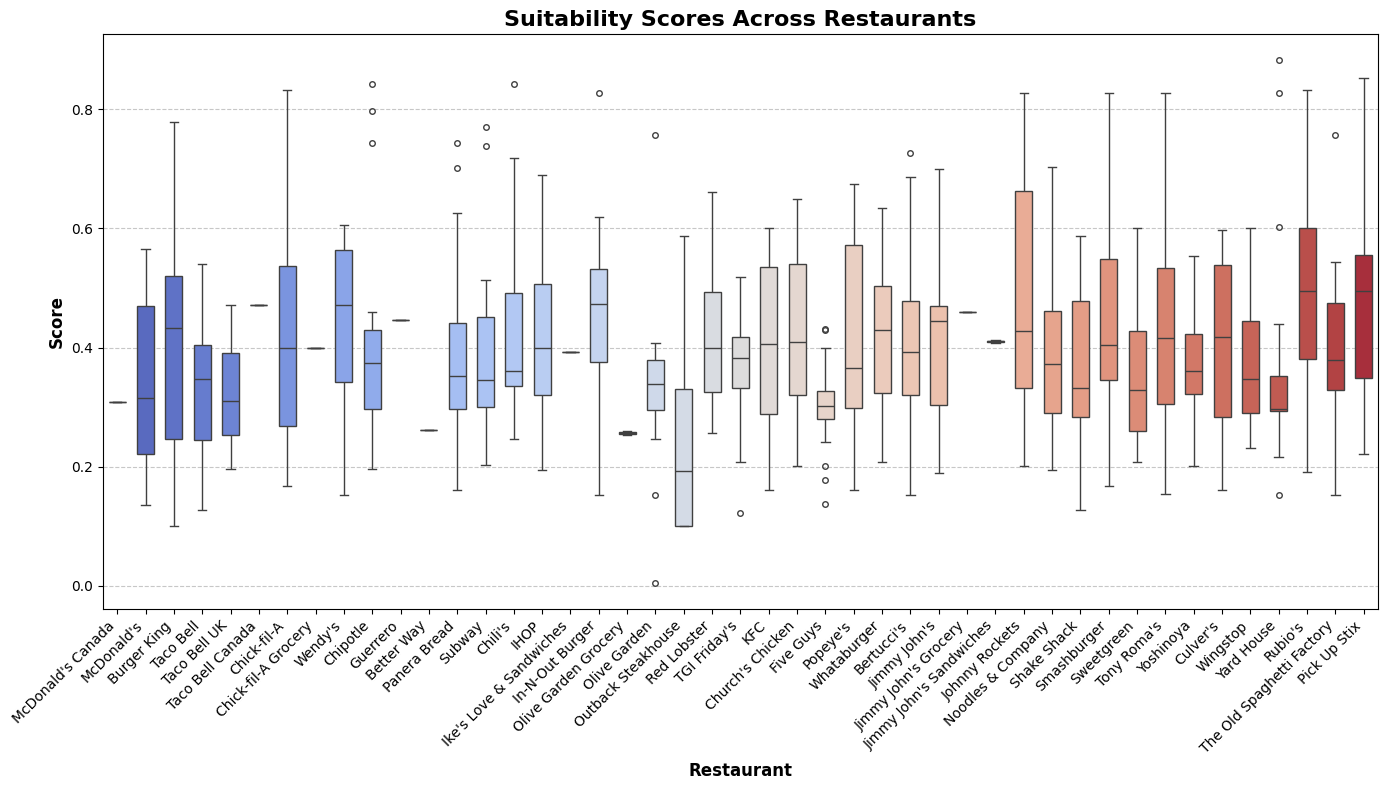

In [27]:
plt.figure(figsize=(14, 8))

# Create a boxplot with customizations
sns.boxplot(
    data=menu_df, 
    x='restaurant_name', 
    y='score', 
    hue='restaurant_name',  # Set hue to match `x` for compatibility with the palette
    dodge=False,  # Prevent overlapping due to hue
    palette='coolwarm', 
    width=0.6,  
    fliersize=4  
)

# Add title and axis labels with custom font sizes
plt.title('Suitability Scores Across Restaurants', fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate and align x-axis labels
plt.xlabel('Restaurant', fontsize=12, weight='bold')
plt.ylabel('Score', fontsize=12, weight='bold')

# Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Ensure everything fits well
plt.show()

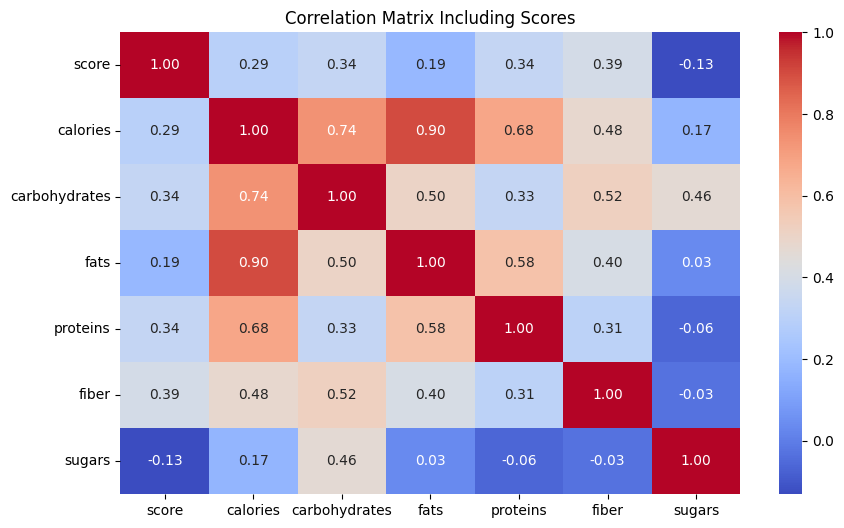

In [25]:
corr_matrix = menu_df[['score', 'calories', 'carbohydrates', 'fats', 'proteins', 'fiber', 'sugars']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Including Scores')
plt.show()

### Exploratory Data Analysis for Individual Food Data (individual_foods_df)

In [28]:
# Load master food CSV file
individual_foods_df = pd.read_csv('./data/individual_foods.csv')

print("Individual Data:", individual_foods_df.shape)
individual_foods_df.head()

Individual Data: (700, 11)


,food_name,category,description,brand,food_category,calories,carbohydrates,fiber,sugars,fats,proteins
0,Broccoli,Individual Foods,BROCCOLI,GREAT VALUE,Frozen Vegetables,24.0,4.71,3.5,1.18,0.00,2.35
1,Broccoli,Individual Foods,BROCCOLI,EAT SMART,Pre-Packaged Fruit & Vegetables,29.0,4.71,3.5,2.35,0.00,3.53
2,Broccoli,Individual Foods,BROCCOLI,NaN,Pre-Packaged Fruit & Vegetables,34.0,5.41,2.0,1.35,0.34,2.70
3,Broccoli,Individual Foods,BROCCOLI,MAMBO,Frozen Vegetables,29.0,3.53,2.4,1.18,0.00,1.18
4,Broccoli,Individual Foods,BROCCOLI,GOOD & GATHER,Frozen Vegetables,24.0,4.71,3.5,1.18,0.00,2.35


In [29]:
# Data Overview
print("Individual Foods Data Overview:")
print(individual_foods_df.info())
print(individual_foods_df.describe())

Individual Foods Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   food_name      700 non-null    object 
 1   category       700 non-null    object 
 2   description    700 non-null    object 
 3   brand          491 non-null    object 
 4   food_category  700 non-null    object 
 5   calories       659 non-null    float64
 6   carbohydrates  685 non-null    float64
 7   fiber          599 non-null    float64
 8   sugars         608 non-null    float64
 9   fats           691 non-null    float64
 10  proteins       690 non-null    float64
dtypes: float64(6), object(5)
memory usage: 60.3+ KB
None
          calories  carbohydrates       fiber      sugars        fats  \
count   659.000000     685.000000  599.000000  608.000000  691.000000   
mean    290.757208      21.097956    4.609117    6.228635   13.816298   
std     365.03

In [30]:
# Missing Values
print("Missing values in Individual Foods Data:")
print(individual_foods_df.isnull().sum())

Missing values in Individual Foods Data:
food_name          0
category           0
description        0
brand            209
food_category      0
calories          41
carbohydrates     15
fiber            101
sugars            92
fats               9
proteins          10
dtype: int64


array([[<Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'carbohydrates'}>],
       [<Axes: title={'center': 'fats'}>,
        <Axes: title={'center': 'fiber'}>],
       [<Axes: title={'center': 'proteins'}>, <Axes: >]], dtype=object)

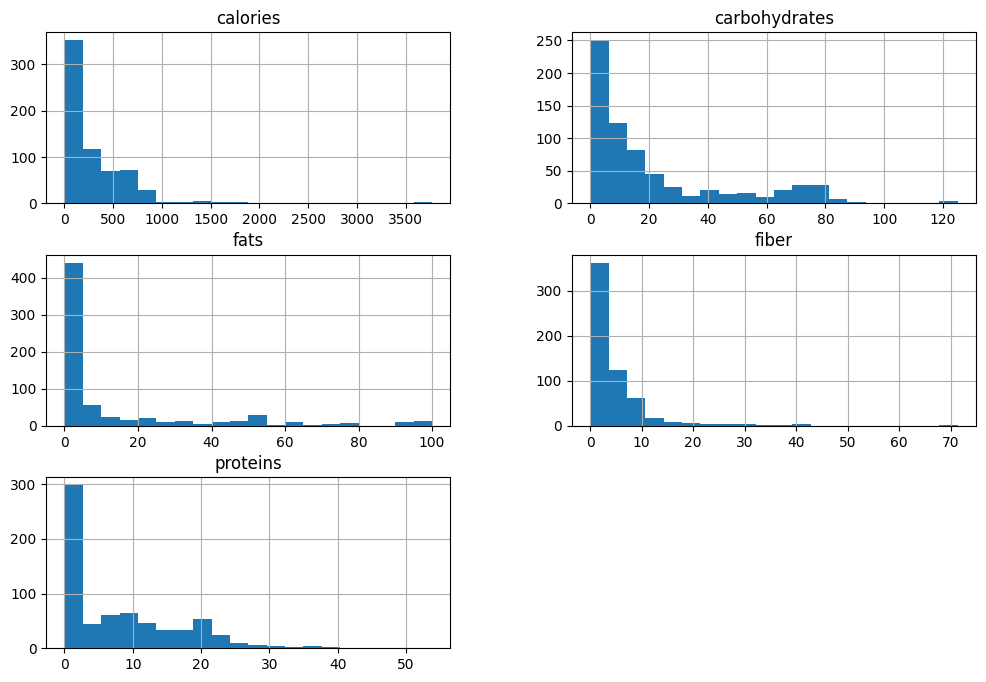

In [31]:
# Distribution of Numerical Columns
individual_foods_df.hist(column=['calories', 'carbohydrates', 'fats', 'fiber', 'proteins'], bins=20, figsize=(12, 8))

In [32]:
# Categorical Analysis
print("Top 10 Food Categories in Individual Foods Data:")
print(individual_foods_df['food_category'].value_counts().head(10))

Top 10 Food Categories in Individual Foods Data:
food_category
Pre-Packaged Fruit & Vegetables             57
Popcorn, Peanuts, Seeds & Related Snacks    54
Vegetables and Vegetable Products           35
Cheese                                      30
Herbs & Spices                              26
Frozen Vegetables                           26
Other Grains & Seeds                        24
Breads & Buns                               18
Frozen Fruit & Fruit Juice Concentrates     18
Canned & Bottled Beans                      16
Name: count, dtype: int64


#### Preprocessing

In [ ]:
# Create suitability_score column for Individual Foods 
individual_foods_df['score'] = individual_foods_df.apply(lambda row: suitability_score(row['carbohydrates'], row['sugars'], row['fiber'], row['proteins']), axis=1)
individual_foods_df.head()

### Patient Data (patient_df)

#### Exploratory Data Analysis

In [6]:
# Load master patient CSV file
patient_df = pd.read_csv('./data/patient_records.csv')

print("Patient Data:",  patient_df.shape)
patient_df.head()

Patient Data: (17118, 24)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Glucose Value,Time Checked
0,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,2.0,0.0,0.0,0.0,0,11,4.0,3.0,117,2024-11-05T14:18:32
1,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,2.0,10.0,0.0,0.0,0,9,4.0,7.0,115,2024-11-05T14:13:32
2,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,5.0,0.0,30.0,1.0,1,12,3.0,4.0,114,2024-11-05T14:08:32
3,2.0,0,0.0,1,24.0,0.0,0.0,1.0,0,0,...,4.0,0.0,0.0,0.0,1,12,6.0,7.0,115,2024-11-05T14:03:33
4,2.0,0,0.0,1,33.0,1.0,0.0,0.0,1,0,...,4.0,0.0,0.0,0.0,1,6,5.0,2.0,115,2024-11-05T13:58:32
